####installing some libraries

In [1]:
pip install seaborn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
pip install lazypredict

In [3]:
pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 10.4 MB/s eta 0:00:00


In [4]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.9 MB/s eta 0:00:00


# 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx
from bokeh.plotting import figure, show
import folium
import datetime
import seaborn as sns
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire, kbc, bmw, gray
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

**Connect Google drive with google colab**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset and creating a dataframe.

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/UK_Accident.csv')
print(df)

         Unnamed: 0 Accident_Index  Location_Easting_OSGR  \
0                 0  200501BS00001              525680.00   
1                 1  200501BS00002              524170.00   
2                 2  200501BS00003              524520.00   
3                 3  200501BS00004              526900.00   
4                 4  200501BS00005              528060.00   
...             ...            ...                    ...   
1504145      464692       2.01E+12              310037.00   
1504146      464693       2.01E+12              321509.00   
1504147      464694       2.01E+12              321337.00   
1504148      464695       2.01E+12              323869.00   
1504149      464696       2.01E+12              314072.00   

         Location_Northing_OSGR  Longitude  Latitude  Police_Force  \
0                     178240.00      -0.19     51.49             1   
1                     181650.00      -0.21     51.52             1   
2                     182240.00      -0.21     51.53     

# 2. Initial Data Analysis

## A. Dataset Overview

In [8]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.00,178240.00,-0.19,51.49,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.00,181650.00,-0.21,51.52,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.00,182240.00,-0.21,51.53,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.00,177530.00,-0.17,51.48,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.00,179040.00,-0.16,51.50,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


Information aboout the columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

Shape of dataframe

In [10]:
df.shape

(1504150, 33)

In [11]:
list(df.columns.values)

['Unnamed: 0',
 'Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location',
 'Year']

# B. Data Cleaning

####Removing some unwanted columns

In [12]:
df.drop(['Unnamed: 0','Accident_Index','LSOA_of_Accident_Location','Location_Northing_OSGR','Location_Easting_OSGR'], axis = 1, inplace = True)
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,-0.21,51.53,1,3,2,1,06/01/2005,5,00:15,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,-0.17,51.48,1,3,1,1,07/01/2005,6,10:35,12,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,-0.16,51.50,1,3,1,1,10/01/2005,2,21:13,12,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


#### Removing some null values from dataset.

In [13]:
df.dropna(subset=['Longitude','Time','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [14]:
print(df.isnull().sum()) #showing how many null values in the column.

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

####Change week days number into day of week

In [15]:
days = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
df['week_days'] = df['Day_of_Week'].map(days)

####Rearrange and change area types

In [16]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace([3], 2, inplace=False)
area_type = {1:'Urban', 2:'Rural'}
df['area_type'] = df['Urban_or_Rural_Area'].map(area_type)

#### Get month and day of month from date column

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day of Month'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

#### GET hours from Hour column

In [18]:
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

Within the dataset, three distinct levels of accident severity were originally categorized as "1 - fatal," "2 - serious," and "3 - slight."

However, for analysis purposes, these have been consolidated into two categories: "0 - slight" and "1 - fatal/serious."

In [19]:
df['Accident_Severity'] = df['Accident_Severity'].replace([1], 1, inplace=False)
df['Accident_Severity'] = df['Accident_Severity'].replace([2], 1, inplace=False)
df['Accident_Severity'] = df['Accident_Severity'].replace([3], 0, inplace=False)

In [20]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,week_days,area_type,Day of Month,Month,Hour
0,-0.19,51.49,1,1,1,1,2005-04-01,3,17:42,12,...,None,None,1,Yes,2005,Tuesday,Urban,1,4,17
1,-0.21,51.52,1,0,1,1,2005-05-01,4,17:36,12,...,None,None,1,Yes,2005,Wednesday,Urban,1,5,17
2,-0.21,51.53,1,0,2,1,2005-06-01,5,00:15,12,...,None,None,1,Yes,2005,Thursday,Urban,1,6,0
3,-0.17,51.48,1,0,1,1,2005-07-01,6,10:35,12,...,None,None,1,Yes,2005,Friday,Urban,1,7,10
4,-0.16,51.50,1,0,1,1,2005-10-01,2,21:13,12,...,None,None,1,Yes,2005,Monday,Urban,1,10,21


#C. Visualization

<Axes: >

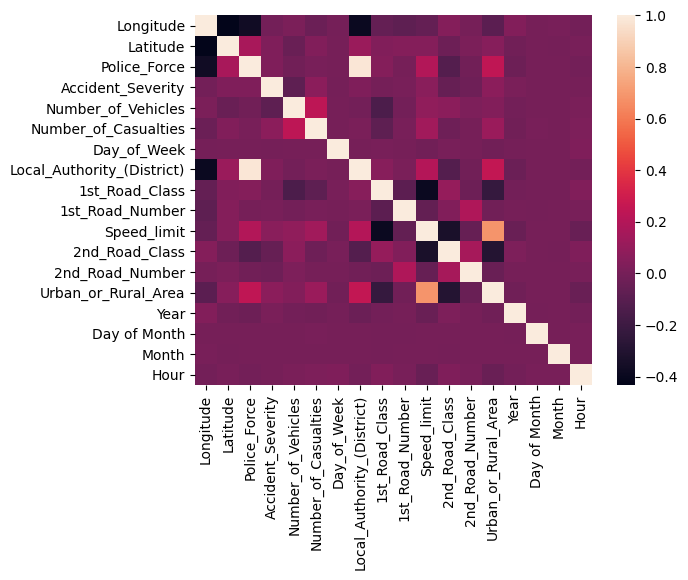

In [21]:
sns.heatmap(df.corr())

# I. Severity of accident

In [22]:
df_accidents = df['Accident_Severity'].value_counts()[df.Accident_Severity.unique()]
df_accidents

1     223899
0    1279991
Name: Accident_Severity, dtype: int64

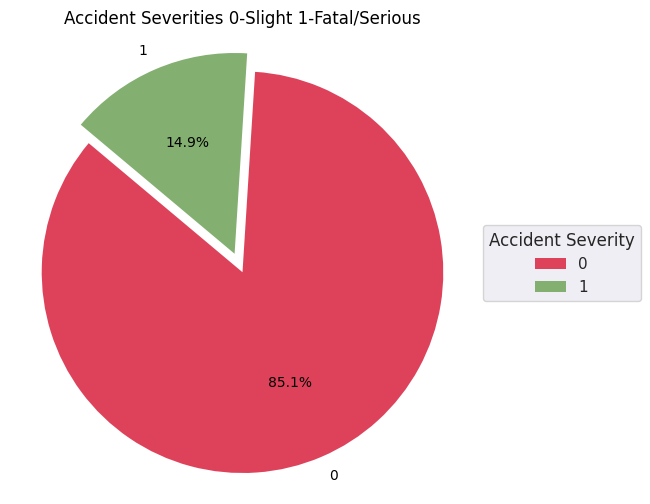

In [23]:
# Create a pie chart using Matplotlib
accident_severity = df['Accident_Severity'].value_counts()
df_accident_severity = pd.DataFrame(accident_severity)
df_accident_severity = df_accident_severity.reset_index()
df_accident_severity.columns = ['Accident Severity', 'Total']
#plt.style.use("dark_background")
plt.figure(figsize=(6, 6))
explode = [0, 0.1]
colors = ['#de425b','#83af70']
plt.pie(df_accident_severity['Total'], labels=df_accident_severity['Accident Severity'], autopct='%1.1f%%', startangle=140, colors=colors, explode = explode)
plt.title('Accident Severities 0-Slight 1-Fatal/Serious')
plt.axis('equal')
sns.set(style="darkgrid")
sns.despine()
sns.set_palette('Set3')
plt.legend(df_accident_severity['Accident Severity'], title="Accident Severity", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Based on the visualization, it can be inferred that a substantial majority, approximately 85%, of accidents are categorized as "slight," while the remaining 15% of accidents are classified as "serious" or "fatal."




#II. TIME OF THE ACCIDENTS

### I. Accidents occured throught the Years

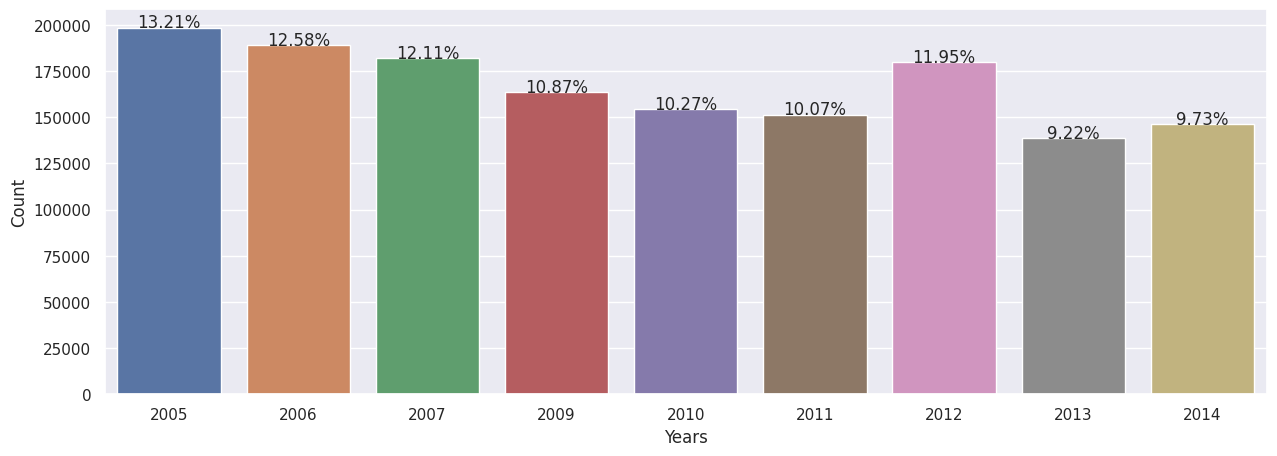

In [24]:
sns.set(style="darkgrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(15,5))
yearplot = sns.countplot(x='Year',data=df)
yearplot.set(xlabel='Years', ylabel='Count')
for p in yearplot.patches:
    height = p.get_height()
    yearplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data illustrates a discernible downward trend in accident rates as the years progress.


### II. Accidents happend on months

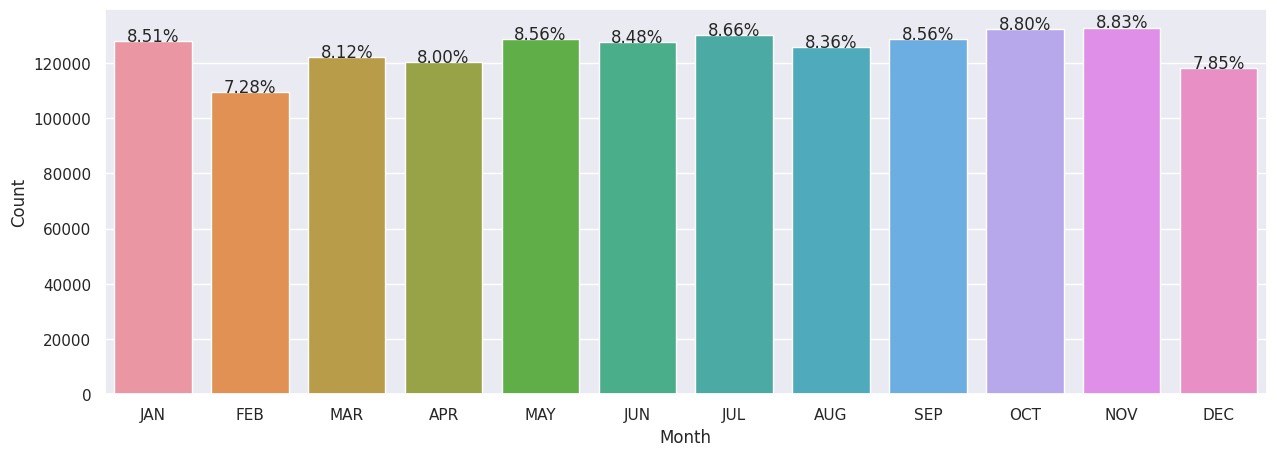

In [25]:
sns.set(style="darkgrid")                               #creating bar graph using seaborn
plt.figure(figsize=(15,5))
monthplot = sns.countplot(x='Month',data=df)
monthplot.set(xlabel='Month', ylabel='Count')
for p in monthplot.patches:
    height = p.get_height()
    monthplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
monthplot.set(xticklabels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

It's evident that the accident rates exhibit a relatively consistent pattern across all months.

### III. Accidents occured on days of week

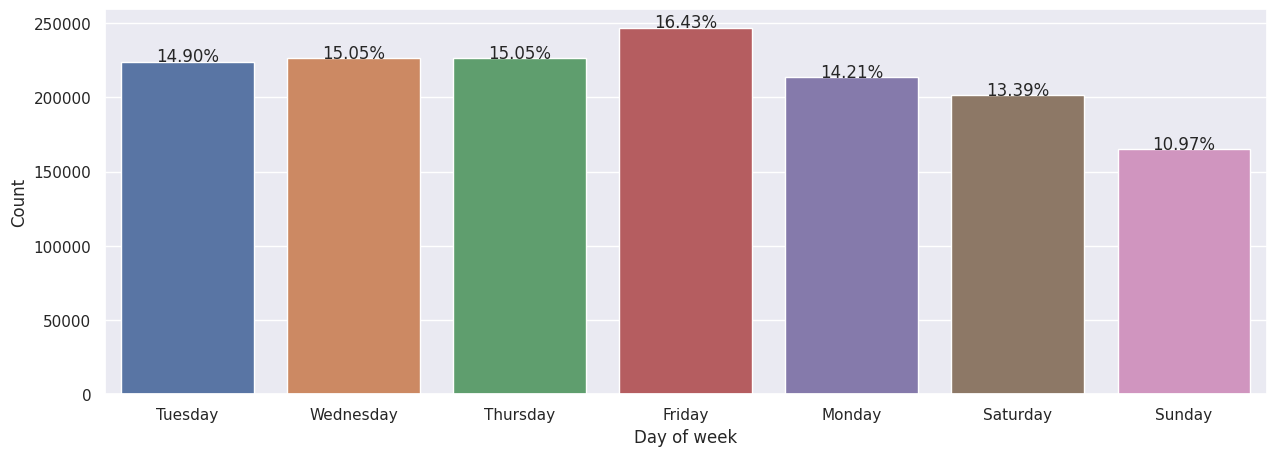

In [26]:
sns.set(style="darkgrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(15,5))
weekplot = sns.countplot(x='week_days',data=df)
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches:
    height = p.get_height()
    weekplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data reveals that Friday has the highest frequency of accidents, while Sunday consistently ranks as the day with the lowest occurrence.

### IV. Accidents based on day of month

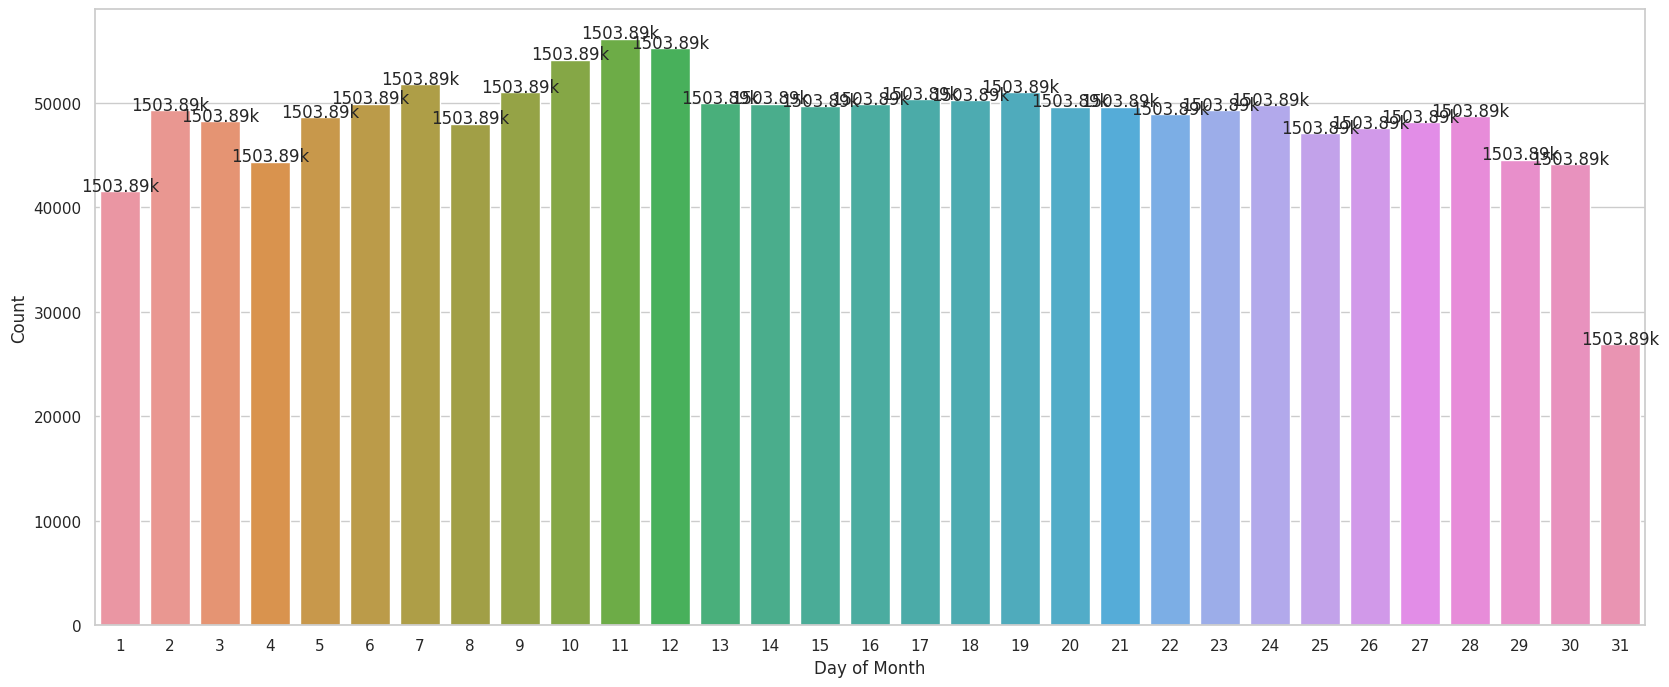

In [27]:
sns.set(style="whitegrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(20,8))
Dayplot = sns.countplot(x='Day of Month',data=df)
Dayplot.set(xlabel='Day of Month', ylabel='Count')
for p in Dayplot.patches:
    height = p.get_height()
    Dayplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((len(df)/1000))+'k',
      ha="center")
plt.show()

In [28]:
acc_months = df['Day of Month'].value_counts()
df_month_acc = pd.DataFrame(acc_months)
df_month_acc = df_month_acc.reset_index()
df_month_acc.columns = ['Day of Month', 'Total']
fig = px.bar(df_month_acc, y='Total', x='Day of Month', text_auto='.2s',hover_data=['Total'], color='Total', title="Accidents across different days of the month")
fig.show()
#template="plotly_dark"

This graph provides a reference for the distribution of accidents across different days of the month.

### V. Accidents based on time of the day

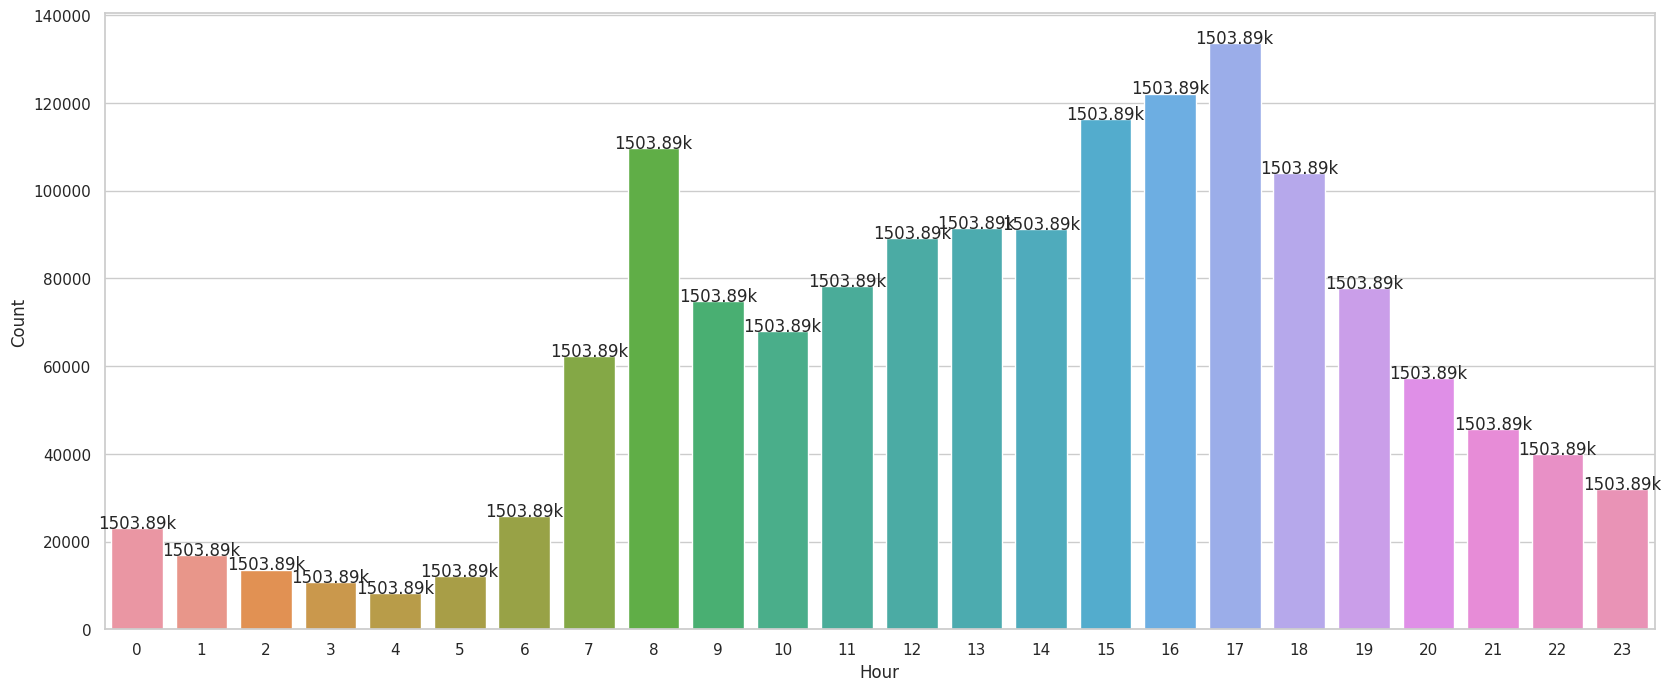

In [29]:
sns.set(style="whitegrid")                                 #creating bar graph using seaborn
plt.figure(figsize=(20,8))
Hourplot = sns.countplot(x='Hour',data=df)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches:
    height = p.get_height()
    Hourplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((len(df)/1000))+'k',
      ha="center")
plt.show()

As evident from the data, the majority of accidents tend to coincide with peak hours during the day.

### Heatmap with the concentration of accidents by month over the years

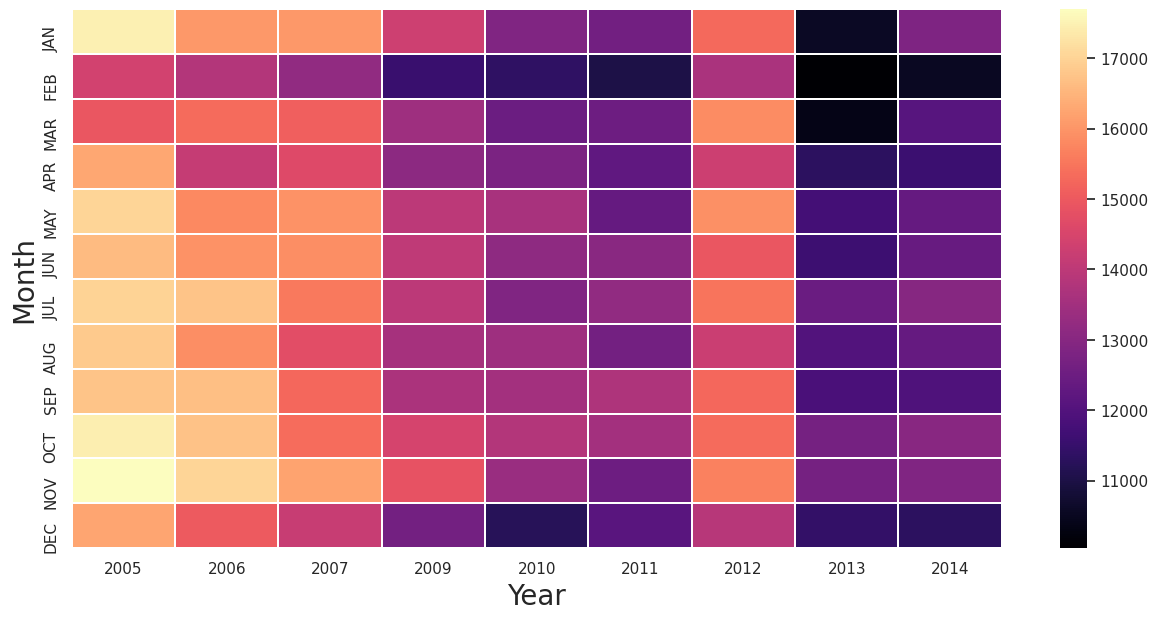

In [30]:
#plt.style.use("dark_background")
df['Ones']=1                                #creating heat map using seaborn
table = pd.pivot_table(df, values='Ones', index=['Month'],columns=['Year'], aggfunc=np.sum)
plt.figure(figsize=(15,7))
yticks = np.array(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
sns.set(rc={"axes.labelsize":20},font_scale=1)
sns.heatmap(table, yticklabels=yticks,linewidths=.1,annot=False,cmap='magma')
plt.show()

The heatmap's color intensity darkens as you progress through the years and months, indicating a decreasing trend in accident rates over time within each month.

## Accidents in different Weather Conditions

In [31]:
df_conditions = df[['Light_Conditions','Weather_Conditions','Road_Surface_Conditions',]]

In [32]:
df_weather_accident = df.groupby(['Accident_Severity', 'Weather_Conditions'], as_index=False).size()
df_weather_severity = pd.DataFrame(df_weather_accident)
df_weather_severity.columns = ['Accident Severity', 'Weather Conditions', 'Count']
fig = px.bar(df_weather_severity, x='Weather Conditions', y='Count', hover_data=['Accident Severity'], color='Accident Severity', labels={'Count':'Total Accidents'}, height=600, width=1000, text_auto=True)
fig.show()
#template="plotly_dark"

Here you can see the accidents in different weather conditions also it shows the type of accident severity. Majority of the accidents are occured in Fine weather Conditions.

## Accidents in different Light Conditions

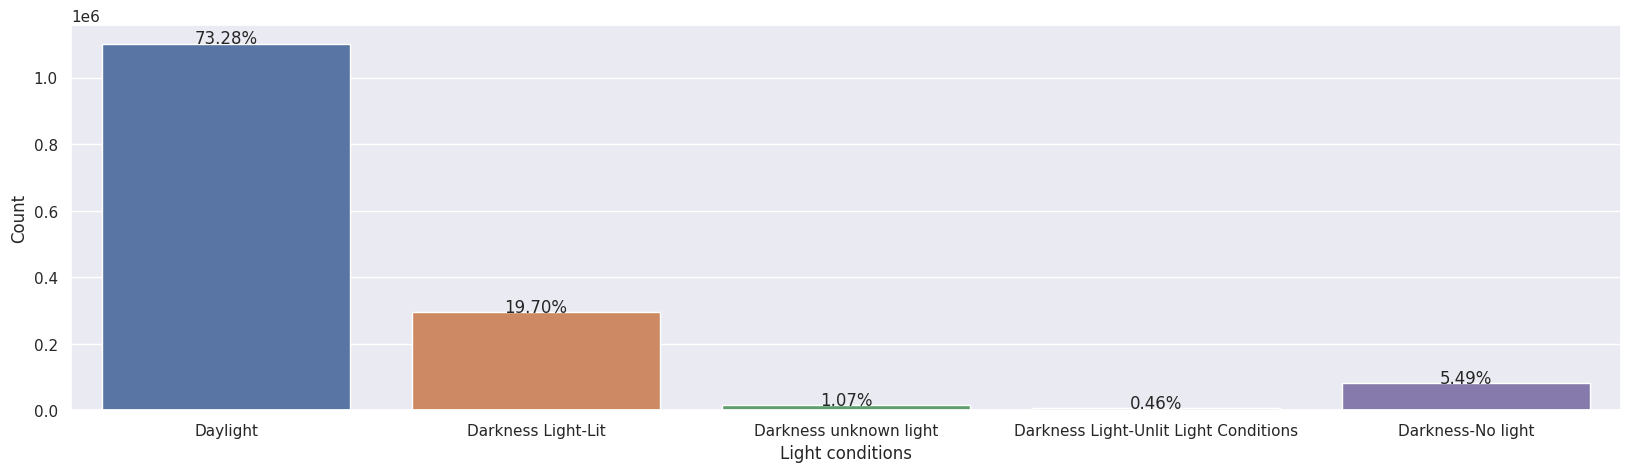

In [33]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(20,5))
lightplot = sns.countplot(x='Light_Conditions',data=df_conditions)
lightplot.set(xlabel='Light conditions', ylabel='Count',xticklabels=['Daylight','Darkness Light-Lit','Darkness unknown light','Darkness Light-Unlit Light Conditions','Darkness-No light'])
for p in lightplot.patches:
    height = p.get_height()
    lightplot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format((height/len(df))*100)+'%', ha="center")
plt.show()

The highest frequency of accidents takes place during daylight conditions which means.

## Accident occured by Road Surface Conditions

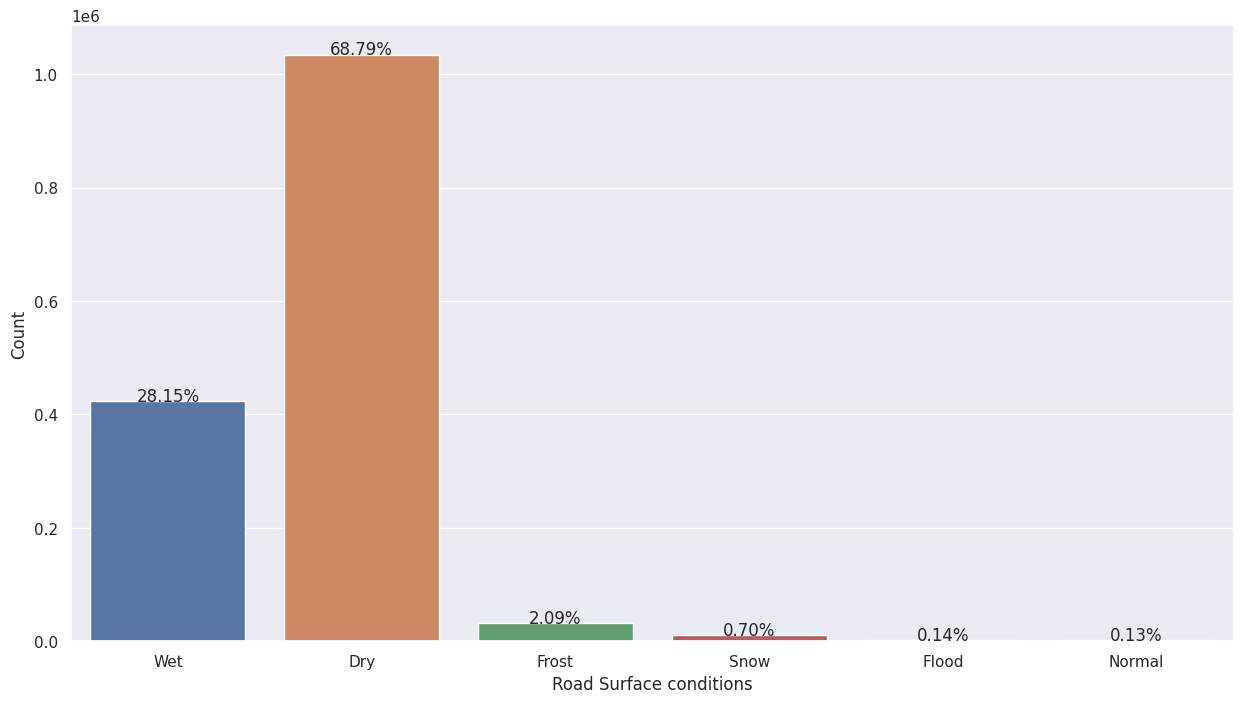

In [34]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,8))
roadplot = sns.countplot(x='Road_Surface_Conditions',data=df_conditions)
roadplot.set(xlabel='Road Surface conditions', ylabel='Count', xticklabels=['Wet','Dry','Frost','Snow','Flood','Normal'])
for p in roadplot.patches:
    height = p.get_height()
    roadplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

This graph provides a clear indication that various road surface conditions do not appear to be a significant contributing factor to accidents, as the majority of accidents occur on dry road surfaces.

## Accident in Urban or Rural Area

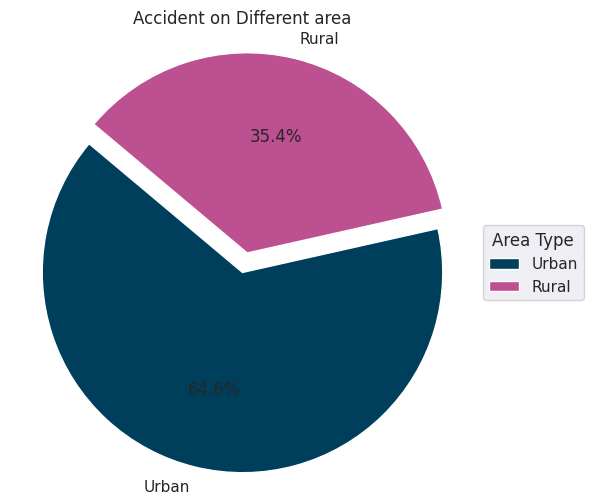

In [35]:
# Create a pie chart using Matplotlib
area_type = df['area_type'].value_counts()
df_area = pd.DataFrame(area_type)
df_area = df_area.reset_index()
df_area.columns = ['Area Type', 'Total']
#plt.style.use("dark_background")
plt.figure(figsize=(6, 6))
explode = [0, 0.1]
colors = ['#003f5c','#bc5090']
plt.pie(df_area['Total'], labels=df_area['Area Type'], autopct='%1.1f%%', startangle=140, colors=colors, explode = explode)
plt.title('Accident on Different area')
plt.axis('equal')
sns.set(style="darkgrid")
sns.despine()
sns.set_palette('Set3')
plt.legend(df_area['Area Type'], title="Area Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Two-thirds of all accidents transpire in urban areas, while the remaining one-third transpire in rural areas.

## Did Police Officer Attend Scene of Accident?

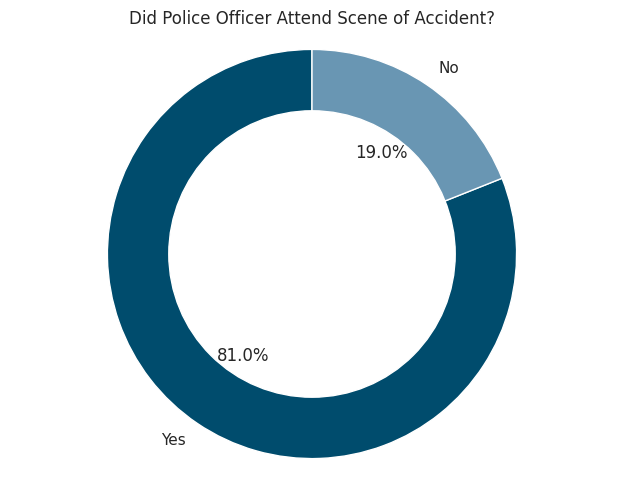

In [36]:
# Create a pie chart using Matplotlib
attend = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()
df_attend = pd.DataFrame(attend)
df_attend = df_attend.reset_index()
df_attend.columns = ['Police', 'Total']

#plt.style.use("dark_background")
fig1, ax1 = plt.subplots()
colors = ['#004c6d','#6996b3']
ax1.pie(df_attend['Total'], labels=df_attend['Police'], colors = colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.title('Did Police Officer Attend Scene of Accident?')
plt.show()

Over a span of ten years, approximately 80% of accidents underwent police investigation.

## Accidents on different road types.

In [37]:
# Create a pie chart using Matplotlib
road_types = df['Road_Type'].value_counts()
df_road = pd.DataFrame(road_types)
df_road = df_road.reset_index()
df_road.columns = ['Road Type', 'Total']

fig = px.bar(df_road, x='Total',y='Road Type',orientation='h')
fig.show()

The majority of accidents occurred on single carriageway roads.

## Accidents on different speed limits.

In [38]:
df_speed = df.groupby(['Speed_limit'], as_index=False).size()
df_speeds = pd.DataFrame(df_speed)
df_speeds.columns = ['Speed limit', 'Count']
#df_speeds
fig = px.line(df_speeds, x='Speed limit', y='Count', markers=True)
fig.show()

Approximately 1 million, of accidents occurred when the speed limit was set at 30. This suggests that adherence to or violations of this specific speed limit may play a crucial role in the occurrence of accidents.

#Accidents on different Junction Control.

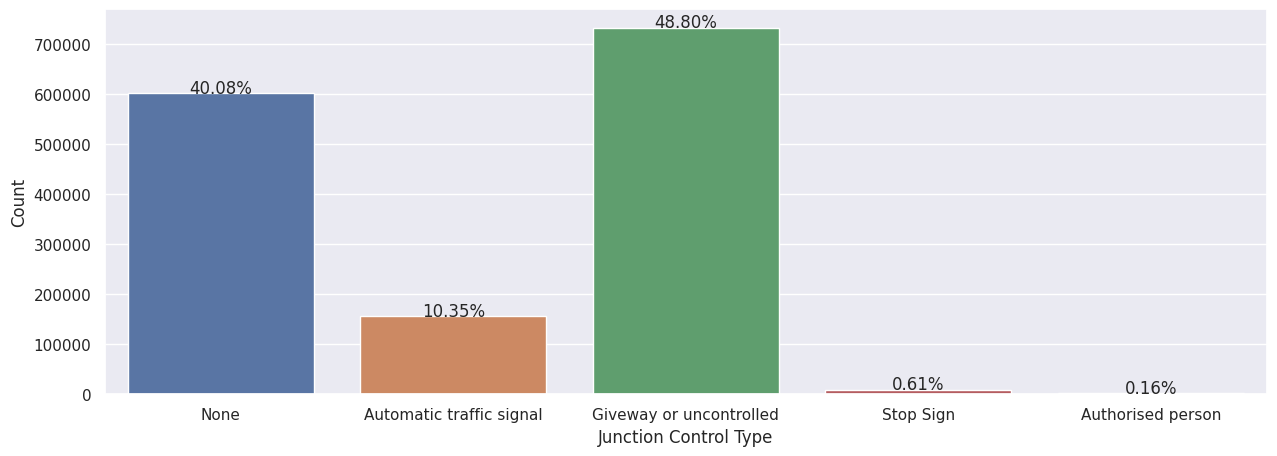

In [39]:
sns.set(style="darkgrid")                           #creating bar graph using seaborn
plt.figure(figsize=(15,5))
areaplot = sns.countplot(x='Junction_Control',data=df)
areaplot.set(xlabel='Junction Control Type', ylabel='Count')
for p in areaplot.patches:
    height = p.get_height()
    areaplot.text(p.get_x()+p.get_width()/2.,
      height + 3,
      '{:1.2f}'.format((height/len(df))*100)+'%',
      ha="center")
plt.show()

The data reveals that half of the accidents occurred at "give way" or "uncontrolled" junction control types, with "No junction control" contributing to 40% of these cases, and "traffic signal" accounting for 10% of the accidents.

#Accidents happened between how many vehicles?

In [40]:
acc_vehicle = df.groupby(['Number_of_Vehicles'], as_index=False).size()
df_acc_vehicle = pd.DataFrame(acc_vehicle)
df_acc_vehicle.columns = ['Number of Vehicles', 'Count']
fig = px.line(df_acc_vehicle, x='Number of Vehicles', y='Count', markers=True)
fig.show()

Most of the accidents are occured between 2 vehicles.

##Feature Engineering

In [41]:
df_count_1 = df['Light_Conditions'].value_counts()
df_count_1

Daylight: Street light present               1102046
Darkness: Street lights present and lit       296292
Darkeness: No street lighting                  82539
Darkness: Street lighting unknown              16108
Darkness: Street lights present but unlit       6905
Name: Light_Conditions, dtype: int64

In [42]:
df_count_2 = df['Weather_Conditions'].value_counts()
df_count_2

Fine without high winds       1203751
Raining without high winds     177632
Other                           33496
Unknown                         28402
Raining with high winds         20810
Fine with high winds            18353
Snowing without high winds      11300
Fog or mist                      8187
Snowing with high winds          1959
Name: Weather_Conditions, dtype: int64

In [43]:
df_count_3 = df['Road_Surface_Conditions'].value_counts()
df_count_3

Dry                          1034504
Wet/Damp                      423400
Frost/Ice                      31399
Snow                           10496
Flood (Over 3cm of water)       2142
Normal                          1949
Name: Road_Surface_Conditions, dtype: int64

In [44]:
df_count_4 = df['Junction_Control'].value_counts()
df_count_4

Giveway or uncontrolled     733853
None                        602694
Automatic traffic signal    155688
Stop Sign                     9177
Authorised person             2478
Name: Junction_Control, dtype: int64

In [45]:
df_count_5 = df['Road_Type'].value_counts()
df_count_5

Single carriageway    1126753
Dual carriageway       221712
Roundabout             100445
One way street          30977
Slip road               15667
Unknown                  8336
Name: Road_Type, dtype: int64

In [46]:
df_final = df.filter(['Accident_Severity','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Road_Type','Junction_Control','Urban_or_Rural_Area','Hour','Month'], axis=1)

In [47]:
df_final['Light_Conditions'].replace(['Daylight: Street light present', 'Darkness: Street lights present and lit','Darkeness: No street lighting','Darkness: Street lighting unknown','Darkness: Street lights present but unlit'],
                        [1, 2, 3, 4, 5], inplace=True)

In [48]:
df_final['Weather_Conditions'].replace(['Fine without high winds', 'Raining without high winds','Other','Unknown','Raining with high winds','Fine with high winds','Snowing without high winds','Fog or mist','Snowing with high winds'],
                        [1, 2, 3, 4, 5,6,7,8,9], inplace=True)

In [49]:
df_final['Road_Surface_Conditions'].replace(['Dry', 'Wet/Damp','Frost/Ice','Snow','Flood (Over 3cm of water)','Normal'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

In [50]:
df_final['Junction_Control'].replace(['Giveway or uncontrolled', 'None','Automatic traffic signal','Stop Sign','Authorised person'],
                        [1, 2, 3, 4, 5], inplace=True)

In [51]:
df_final['Road_Type'].replace(['Single carriageway', 'Dual carriageway','Roundabout','One way street','Slip road','Unknown'],
                        [1, 2, 3, 4, 5,6], inplace=True)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503890 entries, 0 to 1504149
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype
---  ------                   --------------    -----
 0   Accident_Severity        1503890 non-null  int64
 1   Light_Conditions         1503890 non-null  int64
 2   Weather_Conditions       1503890 non-null  int64
 3   Road_Surface_Conditions  1503890 non-null  int64
 4   Road_Type                1503890 non-null  int64
 5   Junction_Control         1503890 non-null  int64
 6   Urban_or_Rural_Area      1503890 non-null  int64
 7   Hour                     1503890 non-null  int64
 8   Month                    1503890 non-null  int64
dtypes: int64(9)
memory usage: 114.7 MB


In [53]:
df_final

,Accident_Severity,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Road_Type,Junction_Control,Urban_or_Rural_Area,Hour,Month
0,1,1,2,2,1,2,1,17,4
1,0,2,1,1,2,3,1,17,5
2,0,2,1,1,1,2,1,0,6
3,0,1,1,1,1,2,1,10,7
4,0,4,1,2,1,2,1,21,10
...,...,...,...,...,...,...,...,...,...
1504145,1,3,7,4,2,2,2,22,7
1504146,0,3,1,4,2,2,2,6,11
1504147,0,2,1,3,1,2,2,2,9
1504148,1,3,2,2,1,1,2,6,12


In [54]:
df_final.to_csv('accident_final.csv', index=False)

<Axes: >

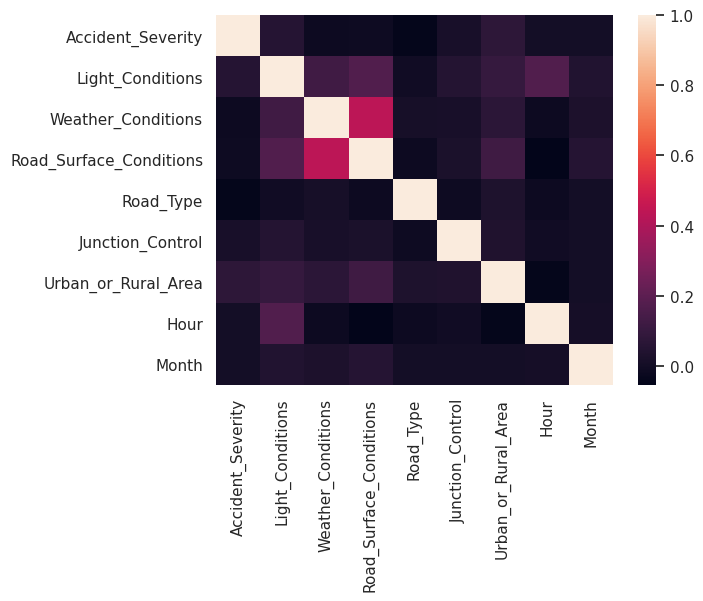

In [55]:
sns.heatmap(df_final.corr())

In [56]:
df_final.corrwith(df_final['Accident_Severity'])

Accident_Severity          1.00
Light_Conditions           0.05
Weather_Conditions        -0.02
Road_Surface_Conditions   -0.01
Road_Type                 -0.04
Junction_Control           0.01
Urban_or_Rural_Area        0.07
Hour                       0.00
Month                      0.00
dtype: float64

In [57]:
df_final.describe()

,Accident_Severity,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Road_Type,Junction_Control,Urban_or_Rural_Area,Hour,Month
count,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00,1503890.00
mean,0.15,1.36,1.43,1.36,1.41,1.63,1.35,13.58,6.57
std,0.36,0.68,1.16,0.60,0.86,0.70,0.48,5.14,3.43
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00
25%,0.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,4.00
50%,0.00,1.00,1.00,1.00,1.00,2.00,1.00,14.00,7.00
75%,0.00,2.00,1.00,2.00,2.00,2.00,2.00,17.00,10.00
max,1.00,5.00,9.00,6.00,6.00,5.00,2.00,23.00,12.00


In [58]:
df_final

,Accident_Severity,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Road_Type,Junction_Control,Urban_or_Rural_Area,Hour,Month
0,1,1,2,2,1,2,1,17,4
1,0,2,1,1,2,3,1,17,5
2,0,2,1,1,1,2,1,0,6
3,0,1,1,1,1,2,1,10,7
4,0,4,1,2,1,2,1,21,10
...,...,...,...,...,...,...,...,...,...
1504145,1,3,7,4,2,2,2,22,7
1504146,0,3,1,4,2,2,2,6,11
1504147,0,2,1,3,1,2,2,2,9
1504148,1,3,2,2,1,1,2,6,12


In [59]:
X = np.asarray(df_final[["Light_Conditions",'Weather_Conditions','Road_Surface_Conditions','Road_Type','Junction_Control','Urban_or_Rural_Area','Hour']])
y = np.asarray(df_final["Accident_Severity"])

In [60]:
# split data into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,random_state = None)

1. XGBOOST

In [61]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
print(XGB_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [63]:
# make predictions for test data
y_pred = XGB_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [64]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Evaluate precision
precision = precision_score(y_test, predictions)
print(f'Precision: {precision:.4f}')

# Evaluate recall
recall = recall_score(y_test, predictions)
print(f'Recall: {recall:.4f}')

# Evaluate F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1:.4f}')

Accuracy: 85.11%
Precision: 0.1579
Recall: 0.0001
F1 Score: 0.0001


In [65]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[320006     16]
 [ 55948      3]]


In [66]:
print('Classification report: \n',classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92    320022
           1       0.16      0.00      0.00     55951

    accuracy                           0.85    375973
   macro avg       0.50      0.50      0.46    375973
weighted avg       0.75      0.85      0.78    375973



In [67]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
scores = cross_val_score(XGB_model, X, y, cv=k_fold)

In [69]:
print("Cross-validated scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validated scores: [0.8506041  0.85047776 0.8508601  0.85203373 0.85151175]
Average accuracy: 0.8510974871832382


2. Randomforest classifier with K-fold

In [70]:
RFC_model = RandomForestClassifier()

In [71]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [72]:
scores = cross_val_score(RFC_model, X, y, cv=k_fold)

In [73]:
print("Cross-validated scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validated scores: [0.84950362 0.84954352 0.84964326 0.85104629 0.85050768]
Average accuracy: 0.8500488732553577


In [74]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = RFC_model.predict(X_test)
prediction = [round(value) for value in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy:.4f}')

# Evaluate precision
precision = precision_score(y_test, prediction)
print(f'Precision: {precision:.4f}')

# Evaluate recall
recall = recall_score(y_test, prediction)
print(f'Recall: {recall:.4f}')

# Evaluate F1 score
f1 = f1_score(y_test, prediction)
print(f'F1 Score: {f1:.4f}')1

Accuracy: 0.8502
Precision: 0.2149
Recall: 0.0026
F1 Score: 0.0051


In [76]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[319496    526]
 [ 55807    144]]


In [77]:
print('Classification report: \n',classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92    320022
           1       0.21      0.00      0.01     55951

    accuracy                           0.85    375973
   macro avg       0.53      0.50      0.46    375973
weighted avg       0.76      0.85      0.78    375973



## I have used pickle library to store my model and predict accident severity.

In [78]:
import pickle
import pickle as pk
import xgboost as xgb


In [79]:
with open("accident-prediction.pkl", "wb") as file:
    pickle.dump(XGB_model, file)

In [80]:
with open('accident-prediction.pkl' , 'rb') as f:
    Xgb = pickle.load(f)

In [81]:
Xgb.predict([[7,4,2,2,2,12,7]])

array([0])

In [83]:
def load_model(model_filename):
    with open(model_filename, 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    return loaded_model

def make_prediction(XGB_model, input_values):
    prediction = XGB_model.predict(input_values)
    return prediction

model_filename = 'accident-prediction.pkl'
xgb_model = load_model(model_filename)

input_values = []
user_input_set = []

user_input = input('''Enter a value of Light Conditions:
1: Daylight: Street light present
2: Darkness: Street lights present and lit
3: Darkeness: No street lighting
4: Darkness: Street lighting unknown
5: Darkness: Street lights present but unlit \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Enter a value of Weather Conditions:
1: Fine without high winds
2: Raining without high winds
3: Other
4: Unknown
5: Raining with high winds
6: Fine with high winds
7: Snowing without high winds
8: Fog or mist
9: Snowing with high winds \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Enter a value of Road Surface Conditions:
1: Dry
2: Wet/Damp
3: Frost/Ice
4: Snow
5: Flood (Over 3cm of water)
6: Normal \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Enter a value of Road Type:
1: Single carriageway
2: Dual carriageway
3: Roundabout
4: One way street
5: Slip road
6: Unknown \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Enter a value of Junction Control:
1: Giveway or uncontrolled
2: None
3: Automatic traffic signal
4: Stop Sign
5: Authorised person \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Accident Place 1: Urban 2: rural \n''')
user_input_set.append(int(user_input))

print("\n")

user_input = input('''Enter a value of Hours (0-24): \n''')
user_input_set.append(int(user_input))

print("\n")

input_values.append(user_input_set)

result = make_prediction(xgb_model, input_values)

for i in result:
  if i == 0:
    print("Accident prediction value: Slight")
  else:
    print("Accident prediction value: Fatal/Serious")

Enter a value of Light Conditions: 
1: Daylight: Street light present
2: Darkness: Street lights present and lit
3: Darkeness: No street lighting
4: Darkness: Street lighting unknown
5: Darkness: Street lights present but unlit 
1


Enter a value of Weather Conditions: 
1: Fine without high winds
2: Raining without high winds
3: Other
4: Unknown
5: Raining with high winds
6: Fine with high winds
7: Snowing without high winds
8: Fog or mist
9: Snowing with high winds 
1


Enter a value of Road Surface Conditions: 
1: Dry
2: Wet/Damp
3: Frost/Ice
4: Snow
5: Flood (Over 3cm of water)
6: Normal 
1


Enter a value of Road Type: 
1: Single carriageway
2: Dual carriageway
3: Roundabout
4: One way street
5: Slip road
6: Unknown 
1


Enter a value of Junction Control: 
1: Giveway or uncontrolled
2: None
3: Automatic traffic signal
4: Stop Sign
5: Authorised person 
1


Accident Place 1: Urban 2: rural 
1


Enter a value of Hours (0-24): 
1


Accident prediction value: Slight
